Libraries and Style Files
-------------------------

In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

import numpy as np

Single-Scatter Recoil Spectrum
===============================

In the paper we have computed the differential cross section for a neutron magnetically scattering off of a single electron. That expression is as follows. 

\begin{equation}
\left ( \frac{d\sigma}{d\Omega} \right )_{CM}= \frac{2m_n^2 \gamma_n^2 \mu_B^2}{\hbar^2}.
\end{equation}

This cross section is easily converted into the single-scatter recoil cross section for monoenergetic neutrons by the same methods as the notebook `0-Preliminaries/B-Neutron-Nucleus-Recoil-Distributions.ipynb`.

\begin{equation}
\begin{aligned}
\frac{d\sigma}{dE_r} &= \int d\phi_{cm} \left ( \frac{d\sigma}{d\Omega} \right )_{CM} \left(\frac{d\cos{(\theta_{cm})}}{dE_r} \right)\\
&=2\pi \left ( \frac{d\sigma}{d\Omega} \right )_{CM} \left(\frac{d\cos{(\theta_{cm})}}{dE_r} \right),
\end{aligned}
\end{equation}

This results in the following differential cross section:

\begin{equation}
\frac{d\sigma}{dE_r} = \frac{2\pi m_n^2 \gamma_n^2 \mu_B^2}{\hbar^2} \frac{(m_n+m_e)^2}{m_n m_e E_n}.
\end{equation}

This can also be written in terms of the maximum recoil for a given neutron energy $E_n$. That results in:

\begin{equation}
\frac{d\sigma}{dE_r} = \frac{8\pi m_n^2 \gamma_n^2 \mu_B^2}{\hbar^2} \frac{1}{E_{\mathrm{max}}(E_n)}.
\end{equation}

Compute the Cross Section
-------------------------

Below we compute this function $d\sigma/dE_r$. It is a uniform distribution at some level up to the maximum recoil energy. This follows from the fact that the angular cross section in the CoM is angle-independent. 

In [2]:
import scipy.constants as co
m_n = co.physical_constants['neutron mass energy equivalent in MeV'][0]*1e3 # neutron mass in keV
m_e = co.physical_constants['electron mass energy equivalent in MeV'][0]*1e3

print("Neutron Mass: {} keV".format(m_n))
print("Electron Mass: {} keV".format(m_e))

Neutron Mass: 939565.4205199999 keV
Electron Mass: 510.99895 keV


In [3]:
def Emax(En): #En in keV; returns maximum recoil energy for neutron energy
    return (4*m_e*m_n*En)/(m_e+m_n)**2

def Enmin(Er): #recoil energy in keV; returns minimum neutron energy to give that recoil energy
    return (Er*(m_e+m_n)**2)/(4*m_e*m_n)

In [4]:
#constants for calcs, first in SI units
gn = co.physical_constants['neutron gyromag. ratio'][0] #default is s^-1 T^-1; CGS is s^-1 Gauss^-1
mub = co.physical_constants['Bohr magneton'][0] #default is J T^-1
hbar = co.physical_constants['reduced Planck constant'][0] #default in J s

#convert to CGS
#see https://en.wikipedia.org/wiki/Centimetre%E2%80%93gram%E2%80%93second_system_of_units
m_n_CGS = co.physical_constants['neutron mass'][0]*1e3 #convert to grams
gn_CGS = gn/1e4
mub_CGS = mub*1e3
hbar_CGS = hbar*1e7

barnincm2 = 1e-24

print('Neutron mass: {} g'.format(m_n_CGS))
print('Neutron gyromagnetic ratio: {} s^-1 Gauss^-1 '.format(gn_CGS))
print('Bohr magneton: {} erg Gauss^-1 '.format(mub_CGS))
print('hbar: {} erg s '.format(hbar_CGS))


Neutron mass: 1.67492749804e-24 g
Neutron gyromagnetic ratio: 18324.7171 s^-1 Gauss^-1 
Bohr magneton: 9.2740100783e-21 erg Gauss^-1 
hbar: 1.054571817e-27 erg s 


In [5]:
sigtot = 8*np.pi*m_n_CGS**2*gn_CGS**2*mub_CGS**2/hbar_CGS**2
print('Total cross section: {} barns'.format(sigtot/barnincm2))

Total cross section: 1.8310038087245937 barns


In [6]:
def dsigdEr(En,Er):
    if(Er<Emax(En)):
      return 8*np.pi*m_n_CGS**2*gn_CGS**2*mub_CGS**2/hbar_CGS**2/Emax(En)
    else: 
      return 0

In [8]:
print(dsigdEr(1000,1)/barnincm2) #1 MeV neutron at 1 keV recoil

0.8425749477714446


In [9]:
print(dsigdEr(1000,3)/barnincm2) #1 MeV neutron at 3 keV recoil

0.0


Integrating Against Flux Spectrum
---------------------------------

To get the observed recoil spectrum, we have to take into account all of the incident neutron energies and their relative rates. To do this we can use the differential flux $\phi(E_n)$ from the function `SNOLAB_flux` in the library `flux_recoil_spec.py`. The expression that will give the recoil spectrum is as follows.

\begin{equation}
R = \frac{\eta N_A}{m} \int dE_n \phi(E_n)\frac{d\sigma}{dE_r}
\end{equation}

$R$ stands for rate in units of events/kg/day/keV. $\eta$ is the number of electrons that are available-to-scatter per atom, $N_A$ is Avogadro's number, and $m$ is the molar mass of the detector material. 

In [10]:
import flux_recoil_spec as frs
E,F,ff,ffspec = frs.SNOLAB_flux(Enmin=1e-3)

fast flux: 4000.0000000000005 n/m^2/day
175
shape of etot: (6000,)
6000 6000
LinregressResult(slope=-0.341989060170171, intercept=-12.883178144228603, rvalue=-0.9953352356165475, pvalue=2.847357267291413e-06, stderr=0.014824519476612728, intercept_stderr=0.06273875262265612)
0.009998654133395216 0.01


In [100]:
import importlib
importlib.reload(frs)

print(frs.Emax(1000))
print(frs.Enmin(2.1731049))
print(frs.dsigdErNE(1000,1)/barnincm2)

2.1731049725220037
999.9999666274732
0.8425749477714446


In [101]:
dsder = lambda x: frs.dsigdErNE(1000,x)
dsderv = np.vectorize(dsder)
print(dsderv([1,2]))

[8.42574948e-25 8.42574948e-25]


In [102]:
Er= np.geomspace(0.1e-3, 10e-3, 100)
print(Er)
drde,dsig=frs.dRdErNE(Er,E,F,N=1,Z=14,A=28,eta=14)

[0.0001     0.00010476 0.00010975 0.00011498 0.00012045 0.00012619
 0.00013219 0.00013849 0.00014508 0.00015199 0.00015923 0.00016681
 0.00017475 0.00018307 0.00019179 0.00020092 0.00021049 0.00022051
 0.00023101 0.00024201 0.00025354 0.00026561 0.00027826 0.00029151
 0.00030539 0.00031993 0.00033516 0.00035112 0.00036784 0.00038535
 0.0004037  0.00042292 0.00044306 0.00046416 0.00048626 0.00050941
 0.00053367 0.00055908 0.0005857  0.00061359 0.00064281 0.00067342
 0.00070548 0.00073907 0.00077426 0.00081113 0.00084975 0.00089022
 0.0009326  0.00097701 0.00102353 0.00107227 0.00112332 0.00117681
 0.00123285 0.00129155 0.00135305 0.00141747 0.00148497 0.00155568
 0.00162975 0.00170735 0.00178865 0.00187382 0.00196304 0.00205651
 0.00215443 0.00225702 0.00236449 0.00247708 0.00259502 0.00271859
 0.00284804 0.00298365 0.00312572 0.00327455 0.00343047 0.00359381
 0.00376494 0.00394421 0.00413201 0.00432876 0.00453488 0.00475081
 0.00497702 0.00521401 0.00546228 0.00572237 0.00599484 0.0062

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



[1.67905119e-22 1.67905119e-22 1.67905119e-22 1.67905119e-22
 1.67905119e-22 1.67905119e-22 1.67905119e-22 1.67905119e-22
 1.67905119e-22 1.67905119e-22 1.67905119e-22 1.67905119e-22
 1.67905119e-22 1.67905119e-22 1.67905119e-22 1.67905119e-22
 1.67905119e-22 1.67905119e-22 1.67905119e-22 1.67905119e-22
 1.67905119e-22 1.67905119e-22 1.67905119e-22 1.67905119e-22
 1.67905119e-22 1.67905119e-22 1.67905119e-22 1.67905119e-22
 1.67905119e-22 1.67905119e-22 1.67905119e-22 1.67905119e-22
 1.67905119e-22 1.67905119e-22 1.67905119e-22 1.67905119e-22
 1.67905119e-22 1.67905119e-22 1.67905119e-22 1.67905119e-22
 1.67905119e-22 1.67905119e-22 1.67905119e-22 1.67905119e-22
 1.67905119e-22 1.67905119e-22 1.67905119e-22 1.67905119e-22
 1.67905119e-22 1.67905119e-22 1.67905119e-22 1.67905119e-22
 1.67905119e-22 1.67905119e-22 1.67905119e-22 1.67905119e-22
 1.67905119e-22 1.67905119e-22 1.67905119e-22 1.67905119e-22
 1.67905119e-22 1.67905119e-22 1.67905119e-22 1.67905119e-22
 1.67905119e-22 1.679051

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



4435.570000000001 [1.89958663e-25 1.89958663e-25 1.89958663e-25 1.89958663e-25
 1.89958663e-25 1.89958663e-25 1.89958663e-25 1.89958663e-25
 1.89958663e-25 1.89958663e-25 1.89958663e-25 1.89958663e-25
 1.89958663e-25 1.89958663e-25 1.89958663e-25 1.89958663e-25
 1.89958663e-25 1.89958663e-25 1.89958663e-25 1.89958663e-25
 1.89958663e-25 1.89958663e-25 1.89958663e-25 1.89958663e-25
 1.89958663e-25 1.89958663e-25 1.89958663e-25 1.89958663e-25
 1.89958663e-25 1.89958663e-25 1.89958663e-25 1.89958663e-25
 1.89958663e-25 1.89958663e-25 1.89958663e-25 1.89958663e-25
 1.89958663e-25 1.89958663e-25 1.89958663e-25 1.89958663e-25
 1.89958663e-25 1.89958663e-25 1.89958663e-25 1.89958663e-25
 1.89958663e-25 1.89958663e-25 1.89958663e-25 1.89958663e-25
 1.89958663e-25 1.89958663e-25 1.89958663e-25 1.89958663e-25
 1.89958663e-25 1.89958663e-25 1.89958663e-25 1.89958663e-25
 1.89958663e-25 1.89958663e-25 1.89958663e-25 1.89958663e-25
 1.89958663e-25 1.89958663e-25 1.89958663e-25 1.89958663e-25
 1.899

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [92]:
print(drde)

[2.48900921e+02 2.44546393e+02 2.36580552e+02 2.32922010e+02
 2.26153777e+02 2.23010185e+02 2.17131730e+02 2.11717876e+02
 2.06687937e+02 2.01976108e+02 1.97516876e+02 1.93253452e+02
 1.89170157e+02 1.85247648e+02 1.79633780e+02 1.76069036e+02
 1.70962455e+02 1.67749365e+02 1.63163994e+02 1.58767867e+02
 1.53084938e+02 1.49019283e+02 1.45108324e+02 1.40118568e+02
 1.35393661e+02 1.30965256e+02 1.26916198e+02 1.22387586e+02
 1.19159552e+02 1.15556427e+02 1.12369164e+02 1.09506515e+02
 1.06425253e+02 1.03646098e+02 1.01031512e+02 9.84326023e+01
 9.54027775e+01 9.24315925e+01 8.95444000e+01 8.63983797e+01
 8.34936322e+01 8.05654766e+01 7.81192993e+01 7.52312293e+01
 7.27789575e+01 6.99532157e+01 6.75334179e+01 6.47994703e+01
 6.24414516e+01 5.98202246e+01 5.75454789e+01 5.50509900e+01
 5.27124363e+01 5.03635835e+01 4.81618836e+01 4.59605618e+01
 4.37726590e+01 4.16096008e+01 3.94812630e+01 3.74967847e+01
 3.54545979e+01 3.35558890e+01 3.16247699e+01 2.98336576e+01
 2.80297769e+01 2.629594

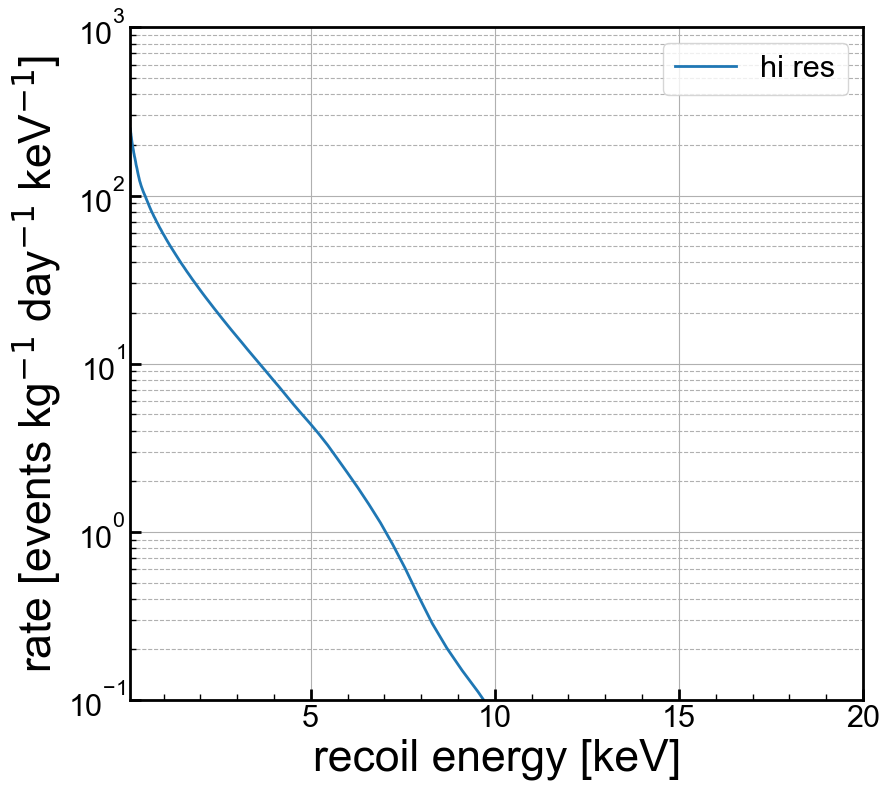

In [93]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes


#print(estring)
#ax1.plot(Er, dRlow,label='low res')
ax1.plot(Er*1000, drde,label="hi res")



ymin = 1e-1
ymax = 1e3

blue = '#118DFA'
#ax1.fill_between(xcq,np.zeros(np.shape(xcq)),thist,step='mid',facecolor='b',alpha=0.4, \
#                 label='')

plt.grid()
#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(1e-4*1000, 20) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]')
ax1.set_ylabel('rate [events kg$^{-1}$ day$^{-1}$ keV$^{-1}$]')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('../1-Paper_Figures/heflux.pdf')
#plt.savefig('../1-Paper_Figures/hist.pdf')
#plt.savefig('figures/first_recspec_library.png')
plt.show()

Converting to keV$_{\mathrm{nr}}$
---------------------------------